In [1]:
from config import *

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns
import scipy.stats as stats
import numpy as np

%matplotlib inline

In [3]:
print(f'{year}年{month}月')

2020年7月


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../py')
import db

In [5]:
conn=db.get_conn()

In [9]:
stat_data = pd.read_sql(sql='select * from MonthlyStats order by Month', con=conn)
stat_data

,Month,Salary_Mean,Salary_Median,JD_Count,HeadCount
0,201906,13387,12500,95375,306980
1,201907,13600,12500,91895,293948
2,201908,13785,12500,91631,289118
3,201909,13817,12500,87938,277901
4,201910,13730,12500,84654,269005
5,201911,13857,12500,81763,262185
6,201912,13938,12500,81142,260002
7,202001,14085,12500,74779,239779
8,202002,14525,12500,65189,204042
9,202003,14653,12500,60070,186531


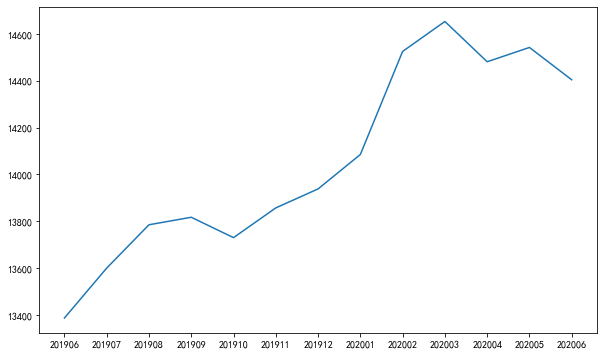

In [10]:
plt.figure(figsize=(10,6))
plt.plot("Month","Salary_Mean",data=stat_data)
plt.show()

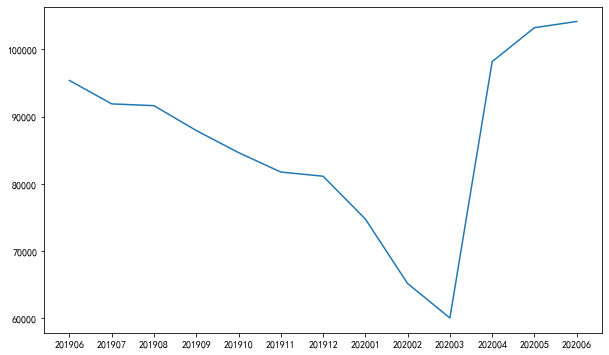

In [11]:
plt.figure(figsize=(10,6))
plt.plot("Month","JD_Count",data=stat_data)
plt.show()

[1.0]


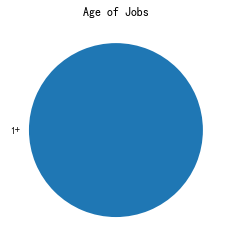

In [12]:
counts=[]
percentages=[]
count1=conn.execute(f"select COUNT(1) from _{year}{month:02}").fetchall()[0][0]
counts.append(count1)

for i in range(1,month-6+1):
    i_count=conn.execute(f"select COUNT(1) from _{year}{month:02} a inner join _{year}{month-i:02} b on a.job_id=b.job_id").fetchall()[0][0]
    counts.append(i_count)
    percentages.append((counts[i-1]-i_count)/counts[0])
    
percentages.append(counts[-1]/counts[0])
print(percentages)

labels=[]
for i in range(1,month-6+1):
    labels.append(i)
labels.append(f"{str(month-6+1)}+")

plt.pie(percentages, labels=labels)
plt.title("Age of Jobs")
plt.show()

# 按照职能统计平均工资

In [13]:
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<100000", con=db.get_conn())

data_career=data_original.groupby(by='career').agg(
    salary=pd.NamedAgg(column='monthly_salary', aggfunc='mean')
)

data_career['salary']=data_career['salary'].astype(int)

data_career[f'2020年{month}月']=data_career['salary']
del data_career['salary']

In [14]:
data_original2019=pd.read_sql(sql=f"select * from _{year-1}{month:02} where monthly_salary>0 and monthly_salary<100000", con=db.get_conn())

data_career2019=data_original2019.groupby(by='career').agg(
    salary=pd.NamedAgg(column='monthly_salary', aggfunc='mean')
)

data_career2019[f'2019年{month}月']=data_career2019['salary'].astype(int)
del data_career2019['salary']

In [15]:
data_career2019.join(data_career, how='outer')

,2019年6月,2020年6月
career,,
ADAS,25787.0,17166.0
Android开发工程师,12947.0,13905.0
CAE,13257.0,13721.0
CTO,27400.0,42935.0
Cocos2d-x开发工程师,14503.0,15742.0
DSP,17333.0,14222.0
ETL,13840.0,13663.0
GIS,11796.0,12492.0
HTML5开发工程师,NaN,11563.0


In [18]:
salary=data_original.monthly_salary.values

In [19]:
salary.sort()

In [20]:
data_original[data_original['monthly_salary'].isna()]

,job_id,monthly_salary,headcount,title,zhinengleibie,career,real_province,province,city,company_id,...,bd_hbase,bd_storm,bd_pig,bd_mahout,bd_impala,bd_yarn,bd_alluxio,bd_flink,bd_presto,bd_heron


In [21]:
import numpy as np

In [26]:
def lorenz_curve(X):
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    X_lorenz[0], X_lorenz[-1]
    fig, ax = plt.subplots(figsize=[6,6])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               color='darkgreen', s=1)
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')
    ax.set_xlabel("累计人群")
    ax.set_ylabel("累计收入")
    ax.set_title("洛伦茨曲线")

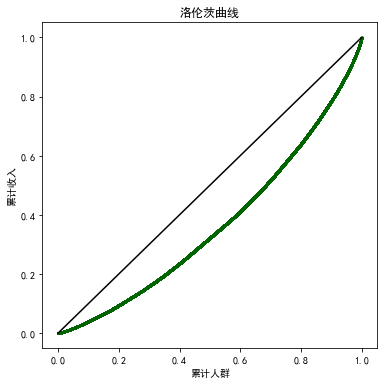

In [27]:
lorenz_curve(salary)

In [ ]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_


In [ ]:
gini(salary)

In [ ]:
len(salary)

In [ ]:
city_salary=data_original.loc[data_original['city']=='北京'].monthly_salary.values
display(gini(city_salary))
display(lorenz_curve(city_salary))

In [ ]:
city_salary=data_original.loc[data_original['city']=='杭州'].monthly_salary.values
display(gini(city_salary))
display(lorenz_curve(city_salary))